In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
import scipy
from tqdm import tqdm

In [2]:
df_tr = pd.read_csv('Train_prep1.csv', dtype ={'msno' : 'category',
                                               'song_id' : 'category',
                                                'source_system_tab' : 'category',
                                                  'source_screen_name' : 'category',
                                                  'source_type' : 'category',
                                                  'target' : np.uint8,
                                                  
                                               'genre_ids': 'category',
                                                  'artist_name' : 'category',
                                                  'composer' : 'category',
                                                  'lyricist' : 'category',
                                               'language' : 'category',
                                               'city' : 'category',
                                               'bd' : np.uint8,
                                               'gender' : 'category',
                                            'registered_via' : 'category',
                                               'name' : 'category',
                                               'country' : 'category'
                                              })
df_te = pd.read_csv('Test_prep1.csv',dtype ={'msno' : 'category',
                                               'song_id' : 'category',
                                                'source_system_tab' : 'category',
                                                  'source_screen_name' : 'category',
                                                  'source_type' : 'category',
                                                  
                                               'genre_ids': 'category',
                                                  'artist_name' : 'category',
                                                  'composer' : 'category',
                                                  'lyricist' : 'category',
                                               'language' : 'category',
                                               'city' : 'category',
                                               'bd' : np.uint8,
                                               'gender' : 'category',
                                            'registered_via' : 'category',
                                               'name' : 'category',
                                               'country' : 'category'})

In [3]:
df_tr.shape, df_te.shape

((7377409, 28), (2556790, 27))

In [4]:
df_tr.isna().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Unnamed: 0.1.1        0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
city                  0
bd                    0
gender                0
registered_via        0
name                  0
country               0
membership_days       0
registration_year     0
registration_month    0
registration_date     0
expiration_year       0
expiration_month      0
song_year             0
dtype: int64

In [5]:
df_tr['bd'].value_counts()

0     2940497
25     261906
24     258688
26     257868
22     255731
       ...   
85         12
89         11
93         10
78          7
76          3
Name: bd, Length: 91, dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='bd'>

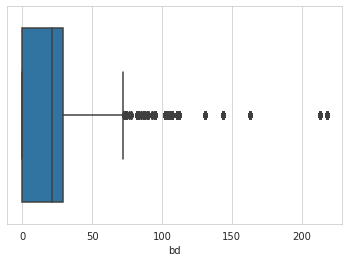

In [7]:
sns.set_style('whitegrid') 
sns.boxplot(df_tr['bd'] )

- Age Feature  contains outliers so we need to handle those cases

In [8]:
df_tr['bd'].quantile([.3998, 0.4,0.998, 0.9989, 0.9992])

0.3998    14.0
0.4000    14.0
0.9980    65.0
0.9989    73.0
0.9992    82.0
Name: bd, dtype: float64

In [9]:
# Replacing age values greater than 100 with median 21
# Replacing all zeros with 14
# Replacing age value between 74 and 100 by 74(99.89 Percentile)
df_tr[df_tr['bd'] < 5 ]['bd'].value_counts()

0    2940497
3        507
2        323
Name: bd, dtype: int64

In [10]:
df_tr['bd'].median()

21.0

In [11]:
df_tr[df_tr.bd.isna()]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,...,registered_via,name,country,membership_days,registration_year,registration_month,registration_date,expiration_year,expiration_month,song_year


In [12]:
df_tr.loc[(df_tr['bd'] >= 0) & (df_tr['bd']< 14)  ,'bd'] = 14
df_tr.loc[(df_tr['bd'] > 75) & (df_tr['bd']< 100)  ,'bd'] = 75
df_tr.loc[ df_tr['bd'] >= 100 ,'bd'] = df_tr['bd'].median()
df_tr['bd'] = df_tr['bd'].abs()

In [13]:
df_te.loc[(df_te['bd']< 14) & (df_te['bd'] >= 0) ,'bd'] = 14
df_te.loc[(df_te['bd']< 100) & (df_te['bd'] > 75) ,'bd'] = 75
df_te.loc[ df_te['bd'] >= 100 ,'bd'] = df_tr['bd'].median()
df_te['bd'] = df_te['bd'].abs()

In [14]:
df_tr.bd.isnull().sum()

0

In [15]:
df_te.isna().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Unnamed: 0.1.1        0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
city                  0
bd                    0
gender                0
registered_via        0
name                  0
country               0
membership_days       0
registration_year     0
registration_month    0
registration_date     0
expiration_year       0
expiration_month      0
song_year             0
dtype: int64

Text(0.5, 1.0, 'test')

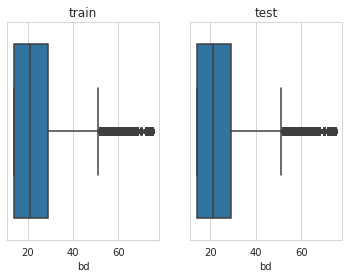

In [16]:
sns.set_style('whitegrid') 
f, axes = plt.subplots(1, 2)
sns.boxplot(df_te['bd'],ax = axes[0] ).set_title('train')
sns.boxplot(df_tr['bd'],ax = axes[1]) .set_title('test')

In [17]:
df_tr['song_year'].max()

2017

In [20]:
# Creating new feature User date of birth based on age of the user and year of the dataset
df_tr['user_bd'] = 2017- df_tr['bd']
df_tr['user_bd'].head(10)

0    2003.0
1    1993.0
2    1993.0
3    1993.0
4    2003.0
5    2003.0
6    1993.0
7    2003.0
8    1991.0
9    1991.0
Name: user_bd, dtype: float64

In [21]:
df_te['user_bd'] = 2017- df_te['bd']
df_te['user_bd'].head(10)

0    2003.0
1    2003.0
2    2003.0
3    1987.0
4    1987.0
5    1987.0
6    1987.0
7    1987.0
8    1987.0
9    2003.0
Name: user_bd, dtype: float64

In [22]:
# Creating new feature of age difference between user and song
df_tr['user_song_agediff'] = df_tr['song_year']- df_tr['user_bd']
df_tr['user_song_agediff'].value_counts()

 13.0    935063
 12.0    443288
 10.0    418537
 11.0    294693
 21.0    228200
          ...  
-75.0        55
-80.0        42
-73.0        38
-81.0        28
 75.0         8
Name: user_song_agediff, Length: 161, dtype: int64

In [23]:
df_te['user_song_agediff'] = df_te['song_year']- df_te['user_bd']
df_te['user_song_agediff'].value_counts()

 13.0    278694
 14.0    142569
 10.0    142130
 12.0    128494
 11.0     92814
          ...  
-55.0        21
-57.0        20
-73.0        14
-75.0         8
 75.0         5
Name: user_song_agediff, Length: 161, dtype: int64

In [24]:
df_tr['user_song_agediff'].isna().sum(),df_te['user_song_agediff'].isna().sum()


(0, 0)

Text(0.5, 1.0, 'test')

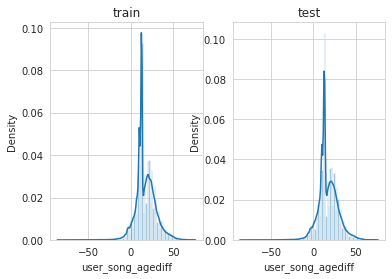

In [25]:
f, axes = plt.subplots(1, 2)
sns.distplot(df_tr['user_song_agediff'], bins = 100, ax = axes[0]).set_title('train')
sns.distplot(df_te['user_song_agediff'], bins = 100, ax = axes[1]).set_title('test')

In [26]:
# Normalizing the user_song_agediff
age_max = df_tr['user_song_agediff'].max()
age_min = df_tr['user_song_agediff'].min()
df_tr['user_song_agediff'] = (df_tr['user_song_agediff'] - age_min)/(age_min-age_max)
df_te['user_song_agediff'] = (df_te['user_song_agediff'] - age_min)/(age_min-age_max)

In [27]:
df_tr.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'msno', 'song_id',
       'source_system_tab', 'source_screen_name', 'source_type', 'target',
       'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'language', 'city', 'bd', 'gender', 'registered_via', 'name', 'country',
       'membership_days', 'registration_year', 'registration_month',
       'registration_date', 'expiration_year', 'expiration_month', 'song_year',
       'user_bd', 'user_song_agediff'],
      dtype='object')

In [28]:
df_te.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'msno', 'song_id',
       'source_system_tab', 'source_screen_name', 'source_type', 'song_length',
       'genre_ids', 'artist_name', 'composer', 'lyricist', 'language', 'city',
       'bd', 'gender', 'registered_via', 'name', 'country', 'membership_days',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month', 'song_year', 'user_bd',
       'user_song_agediff'],
      dtype='object')

In [29]:
# Droping user_bd as it might correlate with user_song_agediff
df_tr.drop(['Unnamed: 0', 'user_bd'], axis=1 , inplace= True)
df_te.drop(['Unnamed: 0', 'user_bd'], axis=1 , inplace= True)

In [30]:
df_tr.loc[df_tr['membership_days'] < 0, 'membership_days'] = 0

In [31]:
days_max = df_tr['membership_days'].max()
days_min = df_tr['membership_days'].min()
df_tr['membership_days'] = (df_tr['membership_days'] - days_min)/(days_min-days_max)
df_te['membership_days'] = (df_te['membership_days'] - days_min)/(days_min-days_max)

Text(0.5, 1.0, 'test')

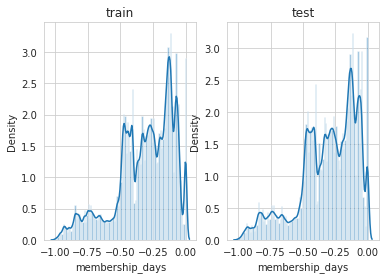

In [32]:
f, axes = plt.subplots(1, 2)
sns.distplot(df_tr['membership_days'], bins = 100, ax = axes[0]).set_title('train')
sns.distplot(df_te['membership_days'], bins = 100, ax = axes[1]).set_title('test')

Text(0.5, 1.0, 'test')

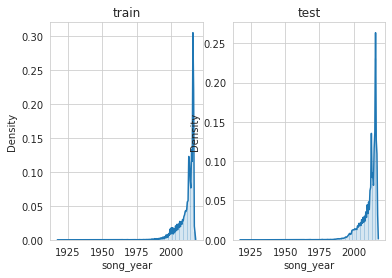

In [33]:
f, axes = plt.subplots(1, 2)
sns.distplot(df_tr['song_year'], bins = 100, ax = axes[0]).set_title('train')
sns.distplot(df_te['song_year'], bins = 100, ax = axes[1]).set_title('test')

In [34]:
#df_tr['song_id'].groupby('msno')
song_count = dict(df_tr['msno'].value_counts())

In [35]:
df_tr['song_count'] = np.nan
for user in song_count.keys():
    df_tr.loc[(df_tr['msno'] == user),'song_count'] = song_count.get(user)

In [36]:
df_te['song_count'] = np.nan
for user in song_count.keys():
    df_te.loc[(df_te['msno'] == user),'song_count'] = song_count.get(user, -1)

In [37]:
df_tr.isna().sum()

Unnamed: 0.1          0
Unnamed: 0.1.1        0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
city                  0
bd                    0
gender                0
registered_via        0
name                  0
country               0
membership_days       0
registration_year     0
registration_month    0
registration_date     0
expiration_year       0
expiration_month      0
song_year             0
user_song_agediff     0
song_count            0
dtype: int64

In [38]:
df_tr.to_csv('df_tr.csv')
df_te.to_csv('df_te.csv')


In [7]:
df_tr = pd.read_csv('df_tr.csv')
df_te = pd.read_csv('df_te.csv')

In [18]:
df_tr = pd.read_csv('df_tr.csv', dtype ={'msno' : 'category',
                                               'song_id' : 'category',
                                                'source_system_tab' : 'category',
                                                  'source_screen_name' : 'category',
                                                  'source_type' : 'category',
                                                  'target' : np.uint8,
                                                  
                                               'genre_ids': 'category',
                                                  'artist_name' : 'category',
                                                  'composer' : 'category',
                                                  'lyricist' : 'category',
                                               'language' : 'category',
                                               'city' : 'category',
                                               'bd' : np.uint8,
                                               'gender' : 'category',
                                            'registered_via' : 'category',
                                               'name' : 'category',
                                               'country' : 'category',
                                         'registration_year':'category', 
                                         'registration_month': 'category',
                                           'registration_date': 'category', 
                                         'expiration_year': 'category', 
                                         'expiration_month': 'category'
                                              })
df_te = pd.read_csv('df_te.csv',dtype ={'msno' : 'category',
                                               'song_id' : 'category',
                                                'source_system_tab' : 'category',
                                                  'source_screen_name' : 'category',
                                                  'source_type' : 'category',
                                                  
                                               'genre_ids': 'category',
                                                  'artist_name' : 'category',
                                                  'composer' : 'category',
                                                  'lyricist' : 'category',
                                               'language' : 'category',
                                               'city' : 'category',
                                               'bd' : np.uint8,
                                               'gender' : 'category',
                                            'registered_via' : 'category',
                                               'name' : 'category',
                                               'country' : 'category',
                                       'registration_year':'category', 
                                         'registration_month': 'category',
                                           'registration_date': 'category', 
                                         'expiration_year': 'category', 
                                         'expiration_month': 'category'})

In [19]:
Y = df_tr['target'].values
X = df_tr.drop(['target','msno','song_id'], axis=1,inplace = False)
X.shape, Y.shape

((7377409, 27), (7377409,))

In [20]:
df_tr.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'msno', 'song_id',
       'source_system_tab', 'source_screen_name', 'source_type', 'target',
       'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'language', 'city', 'bd', 'gender', 'registered_via', 'name', 'country',
       'membership_days', 'registration_year', 'registration_month',
       'registration_date', 'expiration_year', 'expiration_month', 'song_year',
       'user_song_agediff', 'song_count'],
      dtype='object')

In [21]:
df_tr.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1 , inplace= True)
df_te.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1 , inplace= True)

<h2> Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>Encoding categorical features: 'source_system_tab'</h3>

In [112]:
vectorizer = CountVectorizer()
X_systemtab_ohe = vectorizer.fit_transform(X['source_system_tab'].values)
X_te_systemtab_ohe = vectorizer.transform(X_te['source_system_tab'].values)
print("After vectorizations")
print(X_systemtab_ohe.shape)
print(X_te_systemtab_ohe.shape)

After vectorizations
(7377409, 9)
(2556790, 9)


<h3>Encoding categorical features: 'source_screen_name'</h3>

In [113]:
X_screenname_ohe = vectorizer.fit_transform(X['source_screen_name'].values)
X_te_screenname_ohe = vectorizer.transform(X_te['source_screen_name'].values)

print("After vectorizations")
print(X_screenname_ohe.shape)
print(X_te_screenname_ohe.shape)

After vectorizations
(7377409, 21)
(2556790, 21)


<h3>Encoding categorical features: 'source_type'</h3>

In [114]:
X_sourcetype_ohe = vectorizer.fit_transform(X['source_type'].values)
X_te_sourcetype_ohe = vectorizer.transform(X_te['source_type'].values)

print("After vectorizations")
print(X_sourcetype_ohe.shape)
print(X_te_sourcetype_ohe.shape)

After vectorizations
(7377409, 13)
(2556790, 13)


<h3>Encoding categorical features: 'language'</h3>

In [115]:
X_lang_ohe = vectorizer.fit_transform(X['language'].values)
X_te_lang_ohe = vectorizer.transform(X_te['language'].values)

print("After vectorizations")
print(X_lang_ohe.shape)
print(X_te_lang_ohe.shape)

After vectorizations
(7377409, 8)
(2556790, 8)


<h3>Encoding categorical features: 'city'</h3>

In [116]:
X_city_ohe = vectorizer.fit_transform(X['city'].values)
X_te_city_ohe = vectorizer.transform(X_te['city'].values)

print("After vectorizations")
print(X_city_ohe.shape)
print(X_te_city_ohe.shape)

After vectorizations
(7377409, 13)
(2556790, 13)


<h3>Encoding categorical features: 'gender'</h3>

In [117]:
X_gender_ohe = vectorizer.fit_transform(X['gender'].values)
X_te_gender_ohe = vectorizer.transform(X_te['gender'].values)

print("After vectorizations")
print(X_gender_ohe.shape)
print(X_te_gender_ohe.shape)

After vectorizations
(7377409, 3)
(2556790, 3)


<h3>Encoding categorical features: 'registered_via'</h3>

In [118]:
X['registered_via'] = X['registered_via'].replace({'9':'Nine','7':'seven','4':'four','3':'three', '13':'thirteen'})
X_te['registered_via'] = X_te['registered_via'].replace({'9':'Nine','7':'seven','4':'four','3':'three', '13':'thirteen'})

In [119]:
X_reg_via_ohe = vectorizer.fit_transform(X['registered_via'])
X_te_reg_via_ohe = vectorizer.transform(X_te['registered_via'])
print("After vectorizations")
print(X_reg_via_ohe.shape)
print(X_te_reg_via_ohe.shape)

After vectorizations
(7377409, 5)
(2556790, 5)


In [120]:
def response_coding_train( df, status,variable):
    prefix_total_1 = dict(df[df[status] == 1][variable].value_counts())
    prefix_total_0 = dict(df[df[status] == 0][variable].value_counts())
    # To handle the missing value in both the classes
    s1 = set(prefix_total_1.keys())
    s0 = set(prefix_total_0.keys())
    s = s1.union(s0)
    for k in s:
        if k not in s1:
            prefix_total_1.update({k:0})
        if k not in s0:
            prefix_total_0.update({k:0}) 
    prefix_1 = {k:v /(v+prefix_total_0.get(k)) for k,v in prefix_total_1.items()}
    prefix_0 = {k:v /(prefix_total_1.get(k)+v) for k,v in prefix_total_0.items()}
    df['variable_0'] =  [ prefix_0.get(y)  for  y in   df[variable]]
    df['variable_1'] =[ prefix_1.get(y)  for  y in   df[variable]] 
    return df['variable_0'], df['variable_1'] 

In [121]:
def response_coding_test(df, df_te, status, variable):
    prefix_total_1 = dict(df[df[status] == 1][variable].value_counts())
    prefix_total_0 = dict(df[df[status] == 0][variable].value_counts())
    # To handle the missing value in both the classes
    s1 = set(prefix_total_1.keys())
    s0 = set(prefix_total_0.keys())
    s = s1.union(s0)
    for k in s:
        if k not in s1:
            prefix_total_1.update({k:0})
        if k not in s0:
            prefix_total_0.update({k:0}) 
    prefix_1 = {k:v /(v+prefix_total_0.get(k)) for k,v in prefix_total_1.items()}
    prefix_0 = {k:v /(prefix_total_1.get(k)+v) for k,v in prefix_total_0.items()}
    # to handle the values that are not present in the training set
    mylist = list(df[variable].unique())
    df_te['variable_0'] = [ prefix_0.get(y) if y in mylist else 0.5  for  y in  df_te[variable] ]
    df_te['variable_1'] = [ prefix_1.get(y) if y in mylist else 0.5  for  y in  df_te[variable] ]
    return df_te['variable_0'], df_te['variable_1']

<h3>Response coding categorical features: 'gene_ids'</h3>

In [122]:
df_tr['prefix_0'], df_tr['prefix_1'] = response_coding_train(df_tr, 'target', 'genre_ids')
X_gene_ids_rs = np.array(df_tr[['prefix_0',  'prefix_1']])
X_gene_ids_rs.shape

(7377409, 2)

In [123]:
df_te['prefix_0'], df_te['prefix_1'] = response_coding_test(df_tr,df_te, 'target', 'genre_ids')
X_te_gene_ids_rs = np.array(df_te[['prefix_0',  'prefix_1']])
X_te_gene_ids_rs.shape

(2556790, 2)

<h3>Response coding categorical features: 'artist_name'</h3>

In [124]:
df_tr['prefix_0'], df_tr['prefix_1'] = response_coding_train(df_tr, 'target', 'artist_name')
X_artist_rs = np.array(df_tr[['prefix_0',  'prefix_1']])
X_artist_rs.shape

(7377409, 2)

In [125]:
df_te['prefix_0'], df_te['prefix_1'] = response_coding_test(df_tr,df_te, 'target', 'artist_name')
X_te_artist_rs = np.array(df_te[['prefix_0',  'prefix_1']])
X_te_artist_rs.shape

(2556790, 2)

<h3>Response coding categorical features: 'composer'</h3>

In [126]:
df_tr['prefix_0'], df_tr['prefix_1'] = response_coding_train(df_tr, 'target', 'composer')
X_composer_rs = np.array(df_tr[['prefix_0',  'prefix_1']])
X_composer_rs.shape

(7377409, 2)

In [127]:
df_te['prefix_0'], df_te['prefix_1'] = response_coding_test(df_tr,df_te, 'target', 'composer')
X_te_composer_rs = np.array(df_te[['prefix_0',  'prefix_1']])
X_te_composer_rs.shape

(2556790, 2)

<h3>Response coding categorical features:  'lyricist'</h3>

In [128]:
df_tr['prefix_0'], df_tr['prefix_1'] = response_coding_train(df_tr, 'target', 'lyricist')
X_lyricist_rs = np.array(df_tr[['prefix_0',  'prefix_1']])
X_lyricist_rs.shape

(7377409, 2)

In [129]:
df_te['prefix_0'], df_te['prefix_1'] = response_coding_test(df_tr,df_te, 'target', 'lyricist')
X_te_lyricist_rs = np.array(df_te[['prefix_0',  'prefix_1']])
X_te_lyricist_rs.shape

(2556790, 2)

<h3>Response coding categorical features: 'country'</h3>

In [130]:
df_tr['prefix_0'], df_tr['prefix_1'] = response_coding_train(df_tr, 'target',  'country')
X_country_rs = np.array(df_tr[['prefix_0',  'prefix_1']])
X_country_rs.shape

(7377409, 2)

In [131]:
df_te['prefix_0'], df_te['prefix_1'] = response_coding_test(df_tr,df_te, 'target', 'country')
X_te_country_rs = np.array(df_te[['prefix_0',  'prefix_1']])
X_te_country_rs.shape

(2556790, 2)

In [132]:
from scipy.sparse import hstack
X_tr1 = hstack((X_systemtab_ohe , X_screenname_ohe,X_sourcetype_ohe,X_lang_ohe,
X_city_ohe, X_gender_ohe,X_reg_via_ohe,X_gene_ids_rs,
X_artist_rs,X_composer_rs,X_lyricist_rs,X_country_rs , np.array(df_tr[['song_length','bd','registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month', 'song_year',
       'user_song_agediff','song_count']]))).tocsr()
X_te1 = hstack((X_te_systemtab_ohe, X_te_screenname_ohe, X_te_sourcetype_ohe, X_te_lang_ohe,
X_te_city_ohe, X_te_gender_ohe,X_te_reg_via_ohe,X_te_gene_ids_rs,
X_te_artist_rs,X_te_composer_rs,X_te_lyricist_rs,X_te_country_rs ,  np.array(df_te[['song_length','bd','registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month', 'song_year',
       'user_song_agediff','song_count']]))).tocsr()

In [133]:
import scipy
scipy.sparse.save_npz("X_tr1.npz", X_tr1)
scipy.sparse.save_npz("X_tr2.npz", X_te1)

In [22]:
import scipy.sparse
import numpy as np
X_tr1 = scipy.sparse.load_npz("X_tr1.npz")
X_te1 = scipy.sparse.load_npz("X_tr2.npz")

In [23]:
print(X_tr1.shape)
print(X_te1.shape)

(7377409, 92)
(2556790, 92)


### Training Encoded Data

In [24]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split( X_tr1, Y, test_size=0.20, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [40]:
lr = LogisticRegression(C = 10, random_state = 12)

In [45]:
rbf = SVC()

In [ ]:
rbf.fit(X_train1, y_train1)

In [41]:
lr.fit(X_train1, y_train1)

LogisticRegression(C=10, random_state=12)

In [11]:
import pickle
filename = 'model_svc.sav'
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state= 12, verbose= 1)
rf.fit(X_train1,y_train1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
filename = 'model_rf.sav'
pickle.dump(rf open(filename, 'wb'))

In [29]:
from sklearn.metrics import roc_curve,auc

In [42]:
P_train = lr.predict(X_train1)
fpr, tpr, thresholds = roc_curve(y_train1, P_train)
auc_tr = auc(fpr, tpr)
print(auc_tr)

0.5


In [ ]:
P_train = rbf.predict(X_train1)
fpr, tpr, thresholds = roc_curve(y_train1, P_train)
auc_tr = auc(fpr, tpr)
print(auc_tr)

### Training Light GBM on Non-encoded train data

In [21]:
df_tr.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'name', 'country', 'membership_days',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month', 'song_year', 'user_song_agediff',
       'song_count'],
      dtype='object')

In [22]:
X_org = df_tr.drop(['target'],axis = 1)

In [23]:
from sklearn.model_selection import train_test_split
X_train2, X_cv2, y_train2, y_cv2 = train_test_split( X_org, Y, test_size=0.20, random_state=42)

In [47]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'dart',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 256,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 2*10,
        'num_rounds': 1000,
        'metric' : 'auc'
    }

In [ ]:
params1 = {
        'num_leaves': [ 128, 256, 512, 1024, 2048, 4096],
        'feature_fraction': [0.1,0.4,0.6,0.9],
        'max_bin': [127, 255, 511]
    }

In [25]:
import lightgbm as lgb

In [48]:
d_train = lgb.Dataset(X_train2, y_train2)
d_cv = lgb.Dataset(X_cv2, y_cv2)

In [49]:
lgb_model = lgb.train(params, train_set= d_train,  valid_sets=d_cv, verbose_eval=5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.281184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[5]	valid_0's auc: 0.746839
[10]	valid_0's auc: 0.762292
[15]	valid_0's auc: 0.768997
[20]	valid_0's auc: 0.774109
[25]	valid_0's auc: 0.776784
[30]	valid_0's auc: 0.779792
[35]	valid_0's auc: 0.781094
[40]	valid_0's auc: 0.783365
[45]	valid_0's auc: 0.784814
[50]	valid_0's auc: 0.786009
[55]	valid_0's auc: 0.787423
[60]	valid_0's auc: 0.787998
[65]	valid_0's auc: 0.789344
[70]	valid_0's auc: 0.791106
[75]	valid_0's auc: 0.791685
[80]	valid_0's auc: 0.792656
[85]	valid_0's auc: 0.792667
[90]	valid_0's auc: 0.79373
[95]	valid_0's auc: 0.794278
[100]	valid_0's auc: 0.795669
[105]	valid_0's auc: 0.79583
[110]	valid_0's auc: 0.796001
[115]	valid_0's auc: 0.797212
[120]	valid_0's auc: 0.797665
[125]	valid_0's auc: 0.797757
[130]	valid_0's auc: 0.798431
[135]	valid_0's auc: 0.799336
[140]	valid_0's auc: 0.799558
[145]	valid_0's a

In [50]:
P_train = lgb_model.predict(X_train2)

In [51]:
from sklearn.metrics import roc_curve , auc

In [52]:
fpr, tpr, thresholds = roc_curve(y_train2, P_train)
auc_tr = auc(fpr, tpr)
print(auc_tr)

0.8725108696989217


In [53]:
p_test = lgb_model.predict(df_te)

In [54]:
sub_sample = pd.read_csv('sample_submission.csv')

In [55]:
id_ = np.array(sub_sample['id'])

In [56]:
subm1 = pd.DataFrame()
subm1['id'] = id_
subm1['target'] = p_test
subm1.to_csv('subm3.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')